# Exercícios

In [2]:
import cv2
import numpy as np
import sys
import matplotlib as mp
from matplotlib import pyplot as plt
import pickle

print('Opencv version    :', cv2.__version__)
print('Numpy version     :', np.__version__)
print('Matplotlib version:', mp.__version__)
print('Python version    :', sys.version)


Opencv version    : 4.1.1
Numpy version     : 1.15.1
Matplotlib version: 2.2.3
Python version    : 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
# cv2.IMREAD_COLOR : Loads a color image. Any
# transparency of image will be neglected (default)
# cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
# cv2.IMREAD_UNCHANGED : Loads image as such including
# alpha channel
img = cv2.imread('tesla.jpg', cv2.IMREAD_COLOR)

In [4]:
#By default, the flag is cv2.WINDOW_AUTOSIZE.
#But if you specify flag to be cv2.WINDOW_NORMAL,
#you can resize window (helpful when image is too large)
cv2.imshow('image',img)

k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('car.jpg',img)
    cv2.destroyAllWindows()

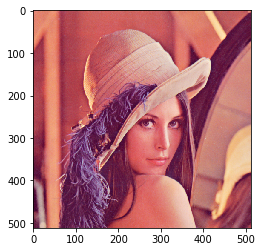

In [5]:
img2 = cv2.imread('lenna.png', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


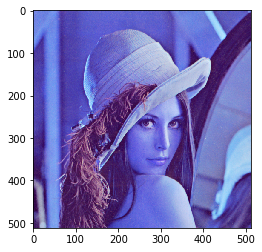

In [6]:
plt.imshow(img2)


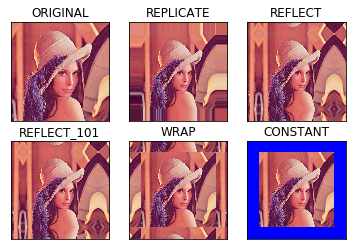

In [7]:
# cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
# cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
# cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
# cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
# cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
#value - Color of border if border type is cv2.BORDER_CONSTANT

BLUE = [255,0,0]
img1 = cv2.imread('lenna.png', cv2.IMREAD_COLOR)
replicate = cv2.copyMakeBorder(img1,80,80,80,80,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,80,80,80,80,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,80,80,80,80,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,80,80,80,80,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,80,80,80,80,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)),plt.title('ORIGINAL')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis

plt.subplot(232),plt.imshow(cv2.cvtColor(replicate,cv2.COLOR_BGR2RGB)),plt.title('REPLICATE')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and  Y axis

plt.subplot(233),plt.imshow(cv2.cvtColor(reflect,cv2.COLOR_BGR2RGB)),plt.title('REFLECT')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis

plt.subplot(234),plt.imshow(cv2.cvtColor(reflect101,cv2.COLOR_BGR2RGB)),plt.title('REFLECT_101')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis

plt.subplot(235),plt.imshow(cv2.cvtColor(wrap,cv2.COLOR_BGR2RGB)),plt.title('WRAP')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis

plt.subplot(236),plt.imshow(cv2.cvtColor(constant,cv2.COLOR_BGR2RGB)),plt.title('CONSTANT')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis

plt.show()

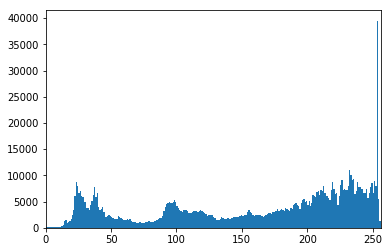

In [8]:
img3 = cv2.imread('tesla.jpg', 0)
# Return a flattened array: numpy.ravel
flattened_array = img3.ravel()
# bins, range
plt.hist(flattened_array, 256, [0,256]);
plt.xlim([0,256])
plt.show()

In [9]:
matrix = np.array([[1,2,3],[4,5,6]])
img = cv2.imread('tesla')
output = open('saved_data.pkl', 'wb')
pickle.dump(matrix, output)
pickle.dump(img, output)
output.close()
input = open('saved_data.pkl', 'rb')
loaded_matrix = pickle.load(input)
loaded_img = pickle.load(input)
input.close()
matrix == loaded_matrix
img == loaded_img

True

In [10]:
# capture from the camera
#cap = cv2.VideoCapture(0)

# capture from a file
cap = cv2.VideoCapture('entrada.avi')

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [11]:
cap = cv2.VideoCapture(0)
fourcc = cv2.CV_FOURCC(*'XVID')
# filename, codec, frames per second (fps) and frame size
out = cv2.VideoWriter('output2.avi',fourcc, 30.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release(), out.release(), cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'CV_FOURCC'